In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine import imputation as mdi
import scipy.stats as stats
import feature_engine
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [2]:
df_train = pd.read_csv('D:/Learning/BigMart SalesPrediction/train.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [6]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df_train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [8]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
df_train['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [10]:
df_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [11]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#set threshold
threshold = 0.7

# dropping columns with missing value rate higher than threshold
df_train = df_train[df_train.columns[df_train.isnull().mean() < threshold]]

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Item_Outlet_Sales',axis=1),df_train['Item_Outlet_Sales'],test_size=0.25,random_state=42, shuffle=True)

In [18]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [19]:
X_train['Item_Weight'] = X_train['Item_Weight'].fillna(X_train['Item_Weight'].mean())

In [20]:
X_train['Outlet_Size'] = X_train['Outlet_Size'].fillna('High')

In [21]:
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
X_train['Outlet_Size'].value_counts()

High      2501
Medium    2103
Small     1788
Name: Outlet_Size, dtype: int64

In [23]:
X_train['Item_Weight'].value_counts()

12.904458    1107
12.150000      62
17.600000      60
13.650000      57
11.800000      55
             ... 
4.590000        1
8.485000        1
6.170000        1
7.685000        1
5.155000        1
Name: Item_Weight, Length: 413, dtype: int64

In [24]:
corrMatrix = X_train.corr()

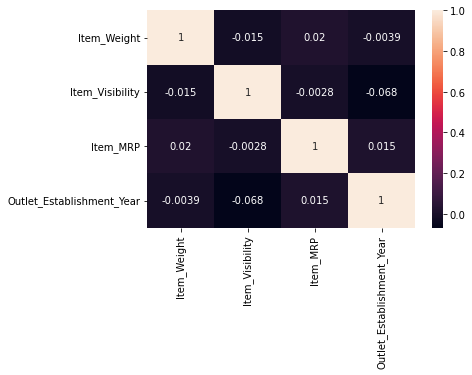

In [25]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [26]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,High,Tier 2,Supermarket Type1


In [27]:
X_train['Outlet_Establishment_Year'] = X_train['Outlet_Establishment_Year'].apply(str)

In [28]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
X_train['Item_Identifier']= label_encoder.fit_transform(X_train['Item_Identifier'])
X_train['Item_Fat_Content']= label_encoder.fit_transform(X_train['Item_Fat_Content'])
X_train['Item_Type']= label_encoder.fit_transform(X_train['Item_Type'])
X_train['Outlet_Identifier']= label_encoder.fit_transform(X_train['Outlet_Identifier'])
X_train['Outlet_Establishment_Year']= label_encoder.fit_transform(X_train['Outlet_Establishment_Year'])
X_train['Outlet_Size']=label_encoder.fit_transform(X_train['Outlet_Size'])
X_train['Outlet_Location_Type']=label_encoder.fit_transform(X_train['Outlet_Location_Type'])
X_train['Outlet_Type']=label_encoder.fit_transform(X_train['Outlet_Type'])

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train = X_train_scaled
print(X_train)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0            0.849580     0.702292              0.25         0.090031   
1            0.681730     0.636797              0.50         0.000000   
2            0.406068     0.464126              0.50         0.483313   
3            0.260813     0.203632              0.25         0.044546   
4            0.179471     0.880917              0.25         0.050687   
...               ...          ...               ...              ...   
6387         0.752098     0.288181              0.50         0.871963   
6388         0.167850     0.657636              0.25         0.358032   
6389         0.939316     0.776719              0.25         0.057686   
6390         0.390575     0.940458              0.75         0.165543   
6391         0.907682     0.702292              0.00         0.051747   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0      0.600000  0.955756           0.333333    

In [30]:
X_test['Item_Weight'] = X_test['Item_Weight'].fillna(X_test['Item_Weight'].mean())
X_test['Outlet_Size'] = X_test['Outlet_Size'].fillna('High')
X_test['Outlet_Establishment_Year'] = X_test['Outlet_Establishment_Year'].apply(str)

In [31]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
X_test['Item_Identifier']= label_encoder.fit_transform(X_test['Item_Identifier'])
X_test['Item_Fat_Content']= label_encoder.fit_transform(X_test['Item_Fat_Content'])
X_test['Item_Type']= label_encoder.fit_transform(X_test['Item_Type'])
X_test['Outlet_Identifier']= label_encoder.fit_transform(X_test['Outlet_Identifier'])
X_test['Outlet_Establishment_Year']= label_encoder.fit_transform(X_test['Outlet_Establishment_Year'])
X_test['Outlet_Size']=label_encoder.fit_transform(X_test['Outlet_Size'])
X_test['Outlet_Location_Type']=label_encoder.fit_transform(X_test['Outlet_Location_Type'])
X_test['Outlet_Type']=label_encoder.fit_transform(X_test['Outlet_Type'])

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns
X_test = X_test_scaled
print(X_test)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0            0.309645     0.579356              0.25         0.084541   
1            0.886633     0.199284              0.25         0.228666   
2            0.153976     0.591289              0.50         0.132801   
3            0.008460     0.484980              0.50         0.143904   
4            0.561760     0.334427              0.50         0.040039   
...               ...          ...               ...              ...   
2126         0.792724     0.776253              0.25         0.025698   
2127         0.411168     0.334427              0.25         0.000000   
2128         0.265651     0.209427              0.25         0.412407   
2129         0.997462     0.119332              0.25         0.084302   
2130         0.415398     0.627088              0.25         0.084028   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0      0.333333  0.200515           0.111111    

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
r_sq = model.score(X_train, y_train)

In [37]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 917.50824632  606.23037687  948.58484792 ... 3339.13368738 2178.80671567
 2180.33895246]


In [38]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5092382563146445


In [39]:
print('intercept:', model.intercept_)

intercept: -386.07911889113484


In [40]:
print('coefficients:', model.coef_)

coefficients: [  25.33260456  -36.78293757  188.4650706  -536.39928587   -8.12744688
 3698.17443074  575.05306779 -132.64967255 -507.66178328 -396.14944982
 2775.87354175]


In [41]:
from sklearn.svm import SVR

In [42]:
model2 = SVR()

In [43]:
model2.fit(X_train, y_train)

SVR()

In [44]:
r_sq2 = model2.score(X_train, y_train)

In [45]:
y_pred2 = model.predict(X_test)
print('predicted response:', y_pred2, sep='\n')

predicted response:
[ 917.50824632  606.23037687  948.58484792 ... 3339.13368738 2178.80671567
 2180.33895246]


In [46]:
print('coefficient of determination:', r_sq2)

coefficient of determination: 0.03900052353123973


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
r_sq2 = model2.score(X_train, y_train)
y_pred2 = model.predict(X_test)
print('predicted response:', y_pred2, sep='\n')
print('coefficient of determination:', r_sq2)

predicted response:
[ 917.50824632  606.23037687  948.58484792 ... 3339.13368738 2178.80671567
 2180.33895246]
coefficient of determination: 0.9384365942339886


In [49]:
test = pd.read_csv('D:/Learning/BigMart SalesPrediction/test.csv')

In [50]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [51]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna('High')
test['Outlet_Establishment_Year'] = test['Outlet_Establishment_Year'].apply(str)

In [52]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
test['Item_Identifier']= label_encoder.fit_transform(test['Item_Identifier'])
test['Item_Fat_Content']= label_encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type']= label_encoder.fit_transform(test['Item_Type'])
test['Outlet_Identifier']= label_encoder.fit_transform(test['Outlet_Identifier'])
test['Outlet_Establishment_Year']= label_encoder.fit_transform(test['Outlet_Establishment_Year'])
test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(test)
test_scaled = pd.DataFrame(test)
test_scaled.columns = test.columns
test = test_scaled
print(test)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9    

In [54]:
test_predictions = model.predict(test)

In [55]:
test2 = pd.read_csv('D:/Learning/BigMart SalesPrediction/test.csv')

In [56]:
submission_df_1 = pd.DataFrame({
                  "Item_Identifier": test2['Item_Identifier'],
                  "Outlet_Identifier": test2['Outlet_Identifier'],
                  "Item_Outlet_Sales": test_predictions})

In [57]:
submission_df_1.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,432677.609011
1,FDW14,OUT017,352564.383662
2,NCN55,OUT010,927597.657031
3,FDQ58,OUT017,595857.541938
4,FDY38,OUT027,905547.867954


In [58]:
submission_df_1.to_csv('D:/Learning/BigMart SalesPrediction/Sales_Predictions.csv', index=False)